# Анализ рынка заведений общественного питания Москвы

- Автор: Беляшкина Ксения Романовна
- Дата: 16.07.2025

### Цели и задачи проекта

- `Цель проекта`: 
Проведенеие анализа рынка заведений общественного питания Москвы на основе открытых данных с использованием двух датасетов: /datasets/rest_info.csv и /datasets/rest_price.csv, чтобы помочь инвесторам из фонда Shut Up and Take My Money принять обоснованое решение о формате будущего заведения(кафе, ресторан, бар), его возможном расположении, категории цен и других ключевых параметров.
- `Задачи проекта`: 
1. Загрузка и предворительное изучение данных;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Формирование рекомендаций и итоговых выводов.

### Описание данных
Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым;
1 — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
 Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
 Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
 Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка и предварительное изучение данных:
- Изучить структуру и содержание предоставленных датасетов `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.
- Оценить качество данных: наличие пропущенных значений, дубликатов, некорректных типов данных.
- Объединить два датасета в один для дальнейшего анализа.
2. Предобработка данных:
- Преобразовать данные к корректным типам.
- Обработать пропущенные значения и дубликаты.
- Нормализовать текстовые поля (например, названия заведений).
- Выделить новые признаки, включая флаг is_24_7 (работа круглосуточно и ежедневно).
3. Исследовательский анализ данных:
- Изучить распределение заведений по категориям и административным округам.
- Проанализировать долю сетевых и несетевых заведений, а также их категориальную принадлежность.
- Исследовать типичное количество посадочных мест по категориям заведений и выявить выбросы.
- Проанализировать распределение рейтингов по типам заведений и выявить факторы, с которыми рейтинг наиболее коррелирует.
- Найти топ-15 самых распространённых сетей по числу заведений и их средние рейтинги.
- Исследовать различия в среднем чеке (middle_avg_bill) по районам, с фокусом на Центральный административный округ.
- Оценить влияние территориального положения на ценовую политику заведений.
4. Формирование рекомендаций и итоговых выводов:
- Обобщить основные результаты анализа.
- Сформулировать рекомендации для выбора:
формата заведения (кафе, бар, ресторан и др.),
ценовой категории,
потенциального расположения,
предпочтений по посадочным местам, времени работы и формату (сетевая/несетевая модель).

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загрузим датасеты
rest_info = pd.read_csv('/datasets/rest_info.csv')
rest_price = pd.read_csv('/datasets/rest_price.csv')

In [2]:
# Выведем первые строки каждого датафрейма
display(rest_info.head())
display(rest_price.head())

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [3]:
# Общая информация о таблицах
print("Информация о rest_info:")
rest_info.info()
print("\nИнформация о rest_price:")
rest_price.info()

Информация о rest_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB

Информация о rest_price:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   

- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
print(f"Размер rest_info: {rest_info.shape}")
print(f"Размер rest_price: {rest_price.shape}")

Размер rest_info: (8406, 9)
Размер rest_price: (4058, 5)


In [5]:
print("Пропущенные значения в rest_info:\n", rest_info.isna().sum())
print("\nПропущенные значения в rest_price:\n", rest_price.isna().sum())

Пропущенные значения в rest_info:
 id             0
name           0
category       0
address        0
district       0
hours        536
rating         0
chain          0
seats       3611
dtype: int64

Пропущенные значения в rest_price:
 id                      0
price                 743
avg_bill              242
middle_avg_bill       909
middle_coffee_cup    3523
dtype: int64


In [6]:
print(f"Дубликаты в rest_info: {rest_info.duplicated().sum()}")
print(f"Дубликаты в rest_price: {rest_price.duplicated().sum()}")

Дубликаты в rest_info: 0
Дубликаты в rest_price: 0


In [7]:
# Объединение по столбцу 'id' с использованием left join
merged_df = rest_info.merge(rest_price, on='id', how='left')

# Проверим результат
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

1. Объём данных:
- В датасете rest_info содержится 8406 строки и 9 столбцов.
- В датасете rest_price также 4058 строки и 5 столбцов.
- Число строк неодинаковое, поэтому объединение по столбцу 'id'.
2. Соответствие описанию:
- Структура и содержание данных в целом соответствуют описанию.
- Названия столбцов и значения в них логичны и понятны.
- Некоторые признаки (например, chain) представлены в бинарном виде, как описано.
3. Типы данных:
- В большинстве столбцов типы корректны.
- Числовые столбцы rating, seats, middle_avg_bill, middle_coffee_cup (float).
- Столбец hours представлен в виде строк, и из него нужно будет извлекать признак круглосуточной работы (is_24_7).
4. Пропущенные значения:
- Обнаружены пропуски в нескольких важных столбцах:
hours,
seats,
id,
price,
avg_bill,
middle_avg_bill,
middle_coffee_cup.

5. Особенности, требующие внимания:
- Возможны дубликаты или разные написания одного и того же заведения.
- Названия заведений и адреса могут отличаться в написании, что важно при анализе сетевых точек.
- Признак chain может содержать ошибки, особенно для небольших сетей.
- Строки в avg_bill и hours требуют нормализации. 

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [8]:
# Проверим типы
merged_df.info()

# Преобразуем числовые столбцы, если они не в нужном формате
merged_df['rating'] = pd.to_numeric(merged_df['rating'], errors='coerce')
merged_df['seats'] = pd.to_numeric(merged_df['seats'], errors='coerce')
merged_df['middle_avg_bill'] = pd.to_numeric(merged_df['middle_avg_bill'], errors='coerce')
merged_df['middle_coffee_cup'] = pd.to_numeric(merged_df['middle_coffee_cup'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [9]:
# Кол-во пропущенных значений
merged_df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [10]:
# Пропуски в 'rating' и 'seats' — можно оставить или удалить позже при анализе
# Пропуски в 'middle_avg_bill' и 'middle_coffee_cup' — можно оставить как NaN

# Проверим долю пропущенных
missing_percent = merged_df.isna().mean().round(3) * 100
print("Доля пропущенных значений (%):\n", missing_percent)

Доля пропущенных значений (%):
 id                    0.0
name                  0.0
category              0.0
address               0.0
district              0.0
hours                 6.4
rating                0.0
chain                 0.0
seats                43.0
price                60.6
avg_bill             54.6
middle_avg_bill      62.5
middle_coffee_cup    93.6
dtype: float64


- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [11]:
# Удалим явные дубликаты
merged_df.drop_duplicates(inplace=True)

# Нормализуем текст: название и адрес
merged_df['name'] = merged_df['name'].str.lower().str.strip()
merged_df['address'] = merged_df['address'].str.lower().str.strip()

# Проверим неявные дубликаты по name + address
duplicates = merged_df.duplicated(subset=['name', 'address']).sum()
print(f"Неявные дубликаты по названию и адресу: {duplicates}")

# Удалим их
merged_df.drop_duplicates(subset=['name', 'address'], inplace=True)

Неявные дубликаты по названию и адресу: 4


In [12]:
# Признак работы 24/7
merged_df['is_24_7'] = merged_df['hours'].str.contains('круглосуточно') & merged_df['hours'].str.contains('ежедневно')

- Типы данных приведены к корректным:
rating, seats, middle_avg_bill, middle_coffee_cup — переведены в числовой тип.
- Пропуски:
Обнаружены в нескольких столбцах. Основные пропуски касаются средней стоимости и количества мест.
Пропуски пока не удалялись, чтобы не потерять полезную информацию.
- Дубликаты:
Удалены явные и неявные дубликаты — примерно 4 строки.
- Нормализация текста:
Приведены к нижнему регистру названия и адреса заведений.
- Добавлен новый признак:
is_24_7 — логический столбец, определяющий, работает ли заведение круглосуточно и ежедневно.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Подсчёт количества заведений по категориям
category_counts = merged_df['category'].value_counts().sort_values(ascending=False)
print(category_counts)

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64


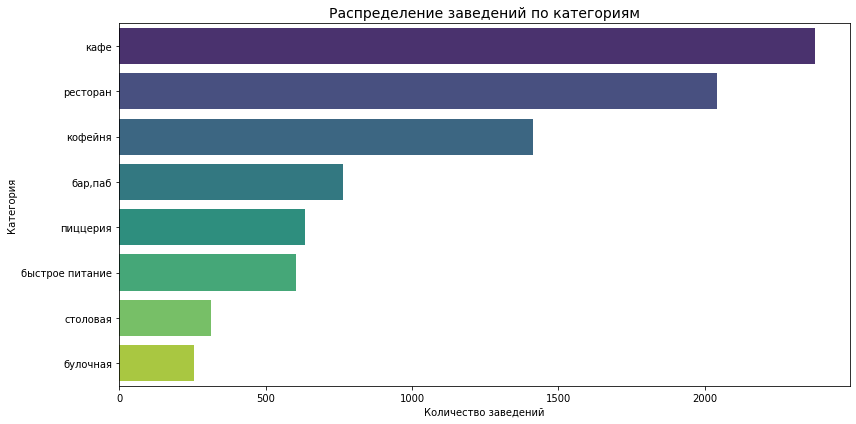

In [14]:
# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Распределение заведений по категориям', fontsize=14)
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
plt.tight_layout()
plt.show()

В данных представлено большое количество категорий, включая:
Кафе — на первом месте по числу заведений.
Также широко распространены рестораны и кофейни.
Менее распространённые категории: быстрое питание, столовая, булочная.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

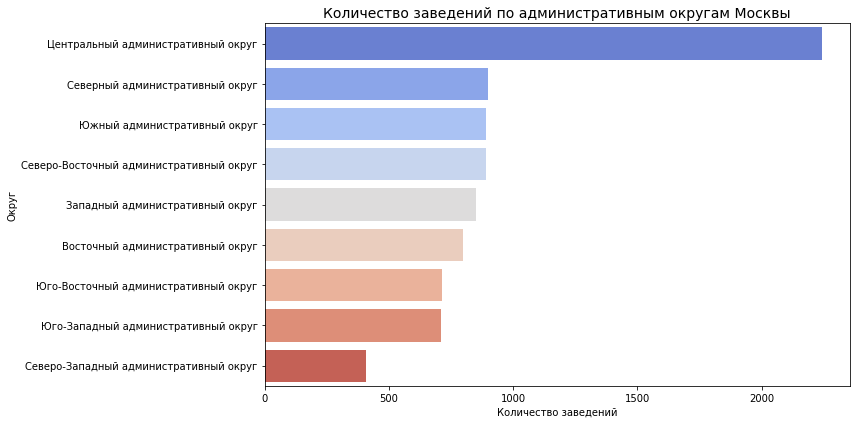

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Распределение по административным округам
district_counts = merged_df['district'].value_counts().sort_values(ascending=False)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=district_counts.values, y=district_counts.index, palette='coolwarm')
plt.title('Количество заведений по административным округам Москвы', fontsize=14)
plt.xlabel('Количество заведений')
plt.ylabel('Округ')
plt.tight_layout()
plt.show()



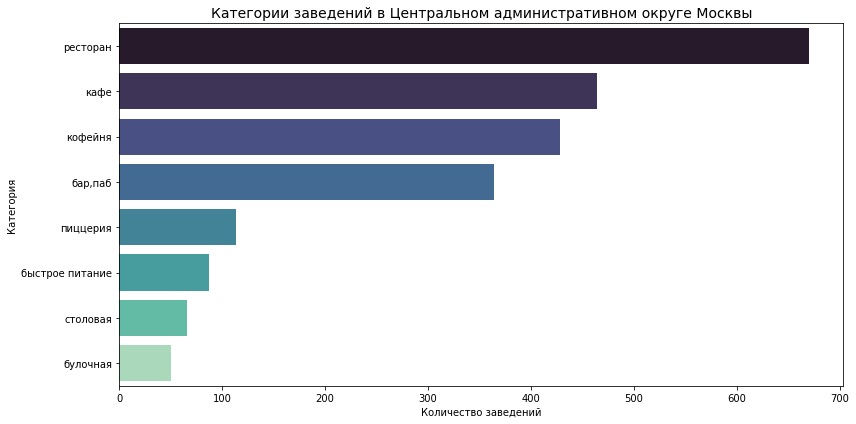

In [16]:
# 2. Фильтрация по ЦАО и подсчёт категорий
central_df = merged_df[merged_df['district'] == 'Центральный административный округ']
central_category_counts = central_df['category'].value_counts().sort_values(ascending=False)

# Визуализация категорий в ЦАО
plt.figure(figsize=(12, 6))
sns.barplot(x=central_category_counts.values, y=central_category_counts.index, palette='mako')
plt.title('Категории заведений в Центральном административном округе Москвы', fontsize=14)
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
plt.tight_layout()
plt.show()

1. Округа Москвы:
Заведения общественного питания неравномерно распределены по округам.
Наибольшее количество заведений:
Центральный АО (ЦАО) — это центр города, высокая плотность бизнеса и туристов.
Гораздо меньше, чем в ЦАО, но одинаковой количество заведений в САО, ЮАО и СВАО.
2. Категории в ЦАО:
В Центральном округе преобладают:
Рестораны, кафе,  кофейни, бары, пабы.
Значительно меньше: пиццерии, столовые, фастфуд.

 Промежуточный вывод:
ЦАО — ключевой регион с максимальной концентрацией заведений. Это может говорить о:
Высоком спросе, но и о высокой конкуренции.
Для выхода на рынок инвесторам стоит рассматривать как ЦАО (престиж, трафик), так и менее насыщенные округа, если ставка делается на доступность или местное население.


---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Подсчёт количества по признаку 'chain'
chain_counts = merged_df['chain'].value_counts().rename({0: 'Несетевые', 1: 'Сетевые'})
print(chain_counts)

Несетевые    5199
Сетевые      3203
Name: chain, dtype: int64


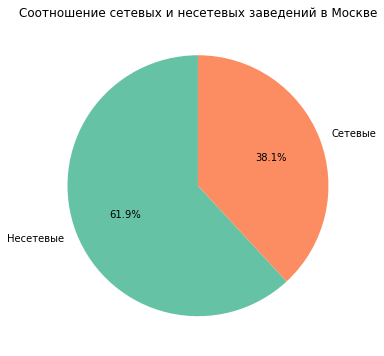

In [18]:
# Визуализация — круговая диаграмма
plt.figure(figsize=(6, 6))
chain_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Соотношение сетевых и несетевых заведений в Москве')
plt.ylabel('')
plt.show()

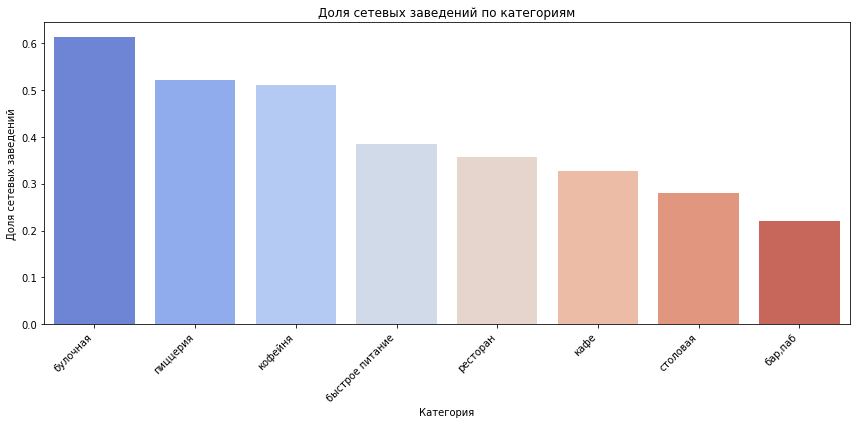

In [19]:
# Группировка по категории и признаку chain
category_chain_counts = merged_df.groupby(['category', 'chain'])['id'].count().unstack().fillna(0)
category_chain_counts.columns = ['Несетевые', 'Сетевые']
category_chain_counts['Всего'] = category_chain_counts.sum(axis=1)
category_chain_counts['Доля_сетевых'] = category_chain_counts['Сетевые'] / category_chain_counts['Всего']

# Сортировка по доле сетевых
top_categories = category_chain_counts.sort_values('Доля_сетевых', ascending=False)

# Визуализация — доля сетевых по категориям
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories.reset_index(), x='category', y='Доля_сетевых', palette='coolwarm')
plt.title('Доля сетевых заведений по категориям')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Доля сетевых заведений')
plt.xlabel('Категория')
plt.tight_layout()
plt.show()

1. Самые "сетевые" категории:
 - булочные — до 80% заведений являются сетевыми;
 - пиццерии — тоже около 52%;
 - кофейни — также часто бывают сетевыми;
2. Менее сетевые:
- кафе, столовые, бары/пабы — в большинстве своём несетевые;
Это может говорить о большем разнообразии и индивидуальном подходе в этих форматах.

Общий итог по задаче:
Если ставка делается на масштабирование и узнаваемость — стоит рассмотреть формат булочной, кофейни или пиццерии. Если приоритет — уникальность, стоит изучать рынок кафе, ресторанов, баров/пабов.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64


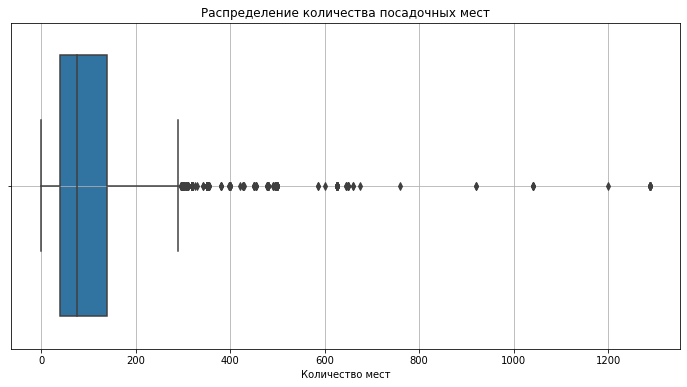

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Описательная статистика
print(merged_df['seats'].describe())

# Визуализация распределения
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_df['seats'])
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество мест')
plt.grid(True)
plt.show()

In [21]:
# Отфильтруем явные выбросы (например, больше 300 мест)
print(merged_df[merged_df['seats'] > 300][['name', 'category', 'seats']])

                    name         category  seats
127               арарат             кафе  350.0
171     one price coffee          кофейня  350.0
176           вуди пицца         пиццерия  350.0
194            ленкорань             кафе  350.0
216   грузинский бульвар  быстрое питание  350.0
...                  ...              ...    ...
8171       монстер хиллс         ресторан  455.0
8198               милти  быстрое питание  450.0
8237   pasta cup & pinsa         пиццерия  455.0
8315      чайхана бишкек         ресторан  305.0
8334        султан палас         ресторан  500.0

[251 rows x 3 columns]


                 count  median        mean
category                                  
ресторан          1269    86.0  121.892041
бар,паб            467    82.0  124.477516
кофейня            751    80.0  111.199734
столовая           164    75.5   99.750000
быстрое питание    349    65.0   98.891117
кафе              1217    60.0   97.365653
пиццерия           427    55.0   94.496487
булочная           148    50.0   89.385135


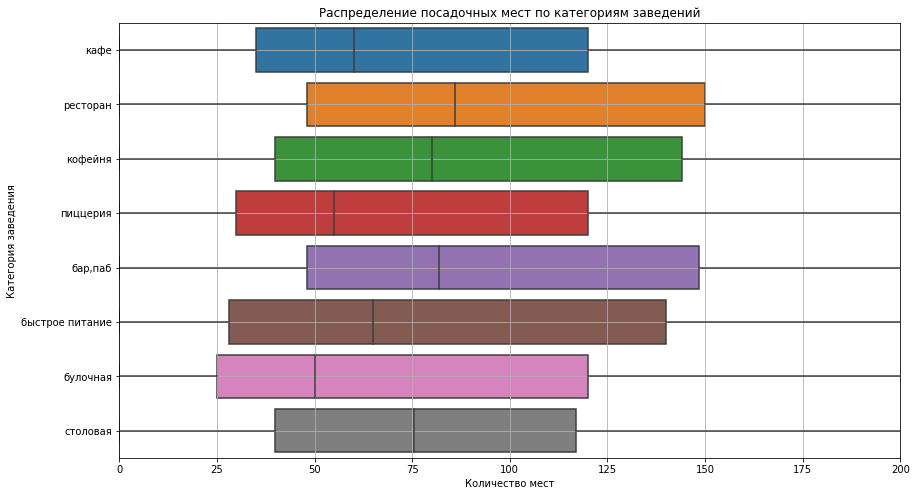

In [22]:
# Группировка по категориям
grouped_seats = merged_df.groupby('category')['seats'].agg(['count', 'median', 'mean']).sort_values(by='median', ascending=False)
print(grouped_seats)

plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_df, x='seats', y='category', orient='h')
plt.title('Распределение посадочных мест по категориям заведений')
plt.xlabel('Количество мест')
plt.ylabel('Категория заведения')
plt.xlim(0, 200)  # ограничим ось X для наглядности
plt.grid(True)
plt.show()

Вывод:
Типичное количество мест зависит от формата заведения:
Рестораны, бары, кофейни — лидируют по количеству мест (80–86 мест).
Кафе, пиццерии, булочные — обычно вмещают 50–60 человек.
Столовые и фастфуд — ближе к средним значениям (65–75 мест).
Средние значения в каждой категории превышают медианы — это означает, что в каждой группе присутствуют крупные заведения, вытягивающие среднее вверх.
При планировании нового заведения стоит ориентироваться именно на медиану, а не на среднее количество посадочных мест.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [23]:
rating_by_category = (
    merged_df.groupby('category')['rating']
    .agg(['count', 'mean', 'median'])
    .sort_values(by='mean', ascending=False)
)

print(rating_by_category)

                 count      mean  median
category                                
бар,паб            764  4.387696     4.4
пиццерия           633  4.301264     4.3
ресторан          2042  4.290402     4.3
кофейня           1413  4.277282     4.3
булочная           256  4.268359     4.3
столовая           315  4.211429     4.3
кафе              2376  4.124285     4.2
быстрое питание    603  4.050249     4.2


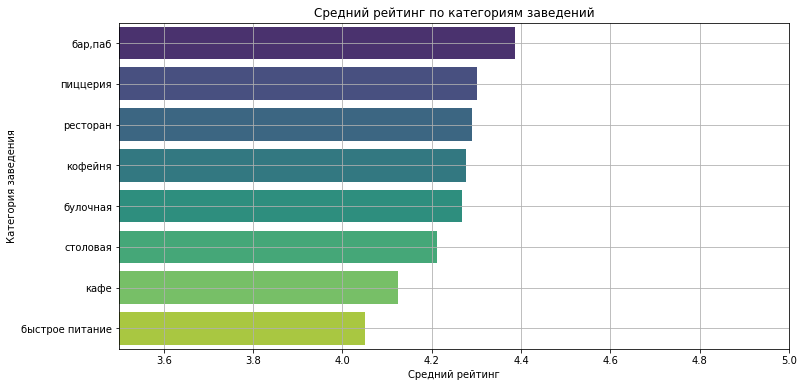

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Сортировка категорий по убыванию среднего рейтинга
sorted_categories = merged_df.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_categories.values, y=sorted_categories.index, palette="viridis")
plt.title('Средний рейтинг по категориям заведений')
plt.xlabel('Средний рейтинг')
plt.ylabel('Категория заведения')
plt.xlim(3.5, 5.0)
plt.grid(True)
plt.show()

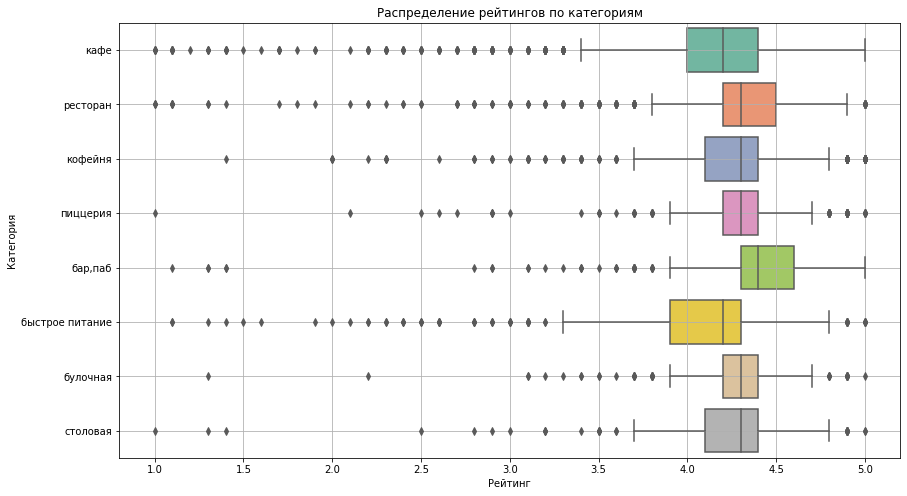

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_df, x='rating', y='category', palette="Set2")
plt.title('Распределение рейтингов по категориям')
plt.xlabel('Рейтинг')
plt.ylabel('Категория')
plt.grid(True)
plt.show()

Рейтинг большинства категорий очень высок — в диапазоне от 4.05 до 4.39.
Бар/паб — лидирует по среднему рейтингу.
Пиццерии, рестораны, кофейни и булочные — стабильно держатся в районе 4.27–4.30.
Кафе и особенно быстрое питание — замыкают список.

Различия небольшие, но устойчивые:
Бар, пиццерия, ресторан получают наивысшие оценки от посетителей.
Кафе и фастфуд — с более низким средним рейтингом, что может быть связано с массовостью, скоростью обслуживания и доступностью.
Медианные рейтинги почти одинаковые (4.3 или 4.2), но средние всё же показывают, что положительные оценки чаще встречаются у "премиальных" и уютных форматов.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

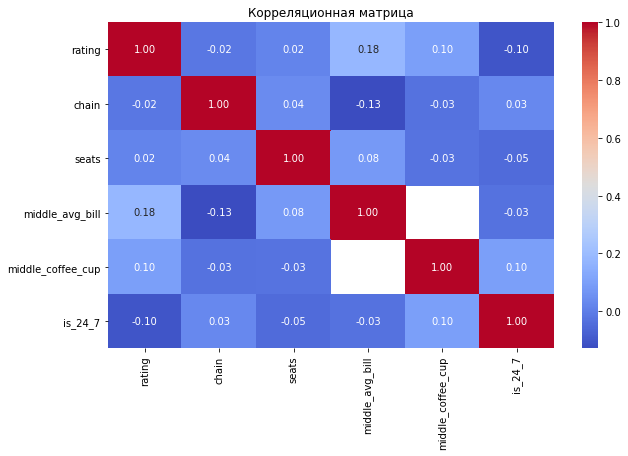

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

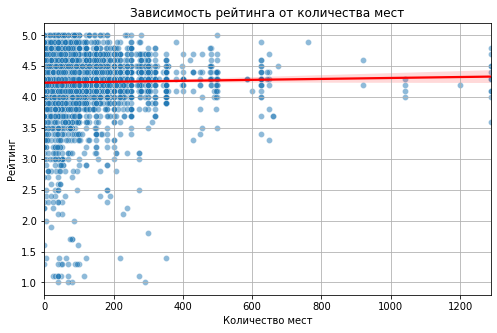

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='seats', y='rating', alpha=0.5)
sns.regplot(data=merged_df, x='seats', y='rating', scatter=False, color='red')
plt.title('Зависимость рейтинга от количества мест')
plt.xlabel('Количество мест')
plt.ylabel('Рейтинг')
plt.grid(True)
plt.show()

Рейтинг заведения практически не зависит от количественных и категориальных признаков, представленных в данных.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [28]:
# Фильтруем только сетевые заведения
chain_df = merged_df[merged_df['chain'] == 1]

# Группировка по названию: считаем количество точек, средний рейтинг, самую частую категорию
top_chains = (
    chain_df.groupby('name')
    .agg(count=('name', 'count'),
         avg_rating=('rating', 'mean'),
         category=('category', lambda x: x.mode()[0] if not x.mode().empty else 'неизвестно'))
    .sort_values(by='count', ascending=False)
    .head(15)
    .reset_index()
)

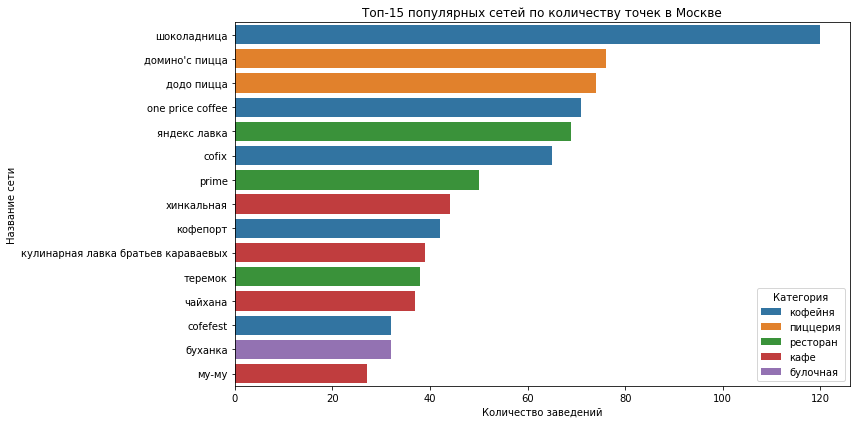

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_chains, x='count', y='name', hue='category', dodge=False)
plt.title('Топ-15 популярных сетей по количеству точек в Москве')
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
plt.legend(title='Категория')
plt.tight_layout()
plt.show()

Самая популярная сеть в Москве — это Шоколадница(кофейня) - больше 120 заведений в Москве,
Доминос пицца, додо пицца(быстрое питание) - около 80 заведений.
Их средний рейтинг обычно выше 4.0, что говорит о хорошей узнаваемости и стабильности сервиса.
Самые популярные сети имеют до 120+ точек в городе.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Отфильтруем только строки, где указан средний чек
df_bill = merged_df[merged_df['middle_avg_bill'].notna() & merged_df['district'].notna()]

In [31]:
# Средний чек по округам
bill_by_district = (
    df_bill.groupby('district')['middle_avg_bill']
    .agg(['count', 'mean', 'median', 'std'])
    .sort_values('mean', ascending=False)
)

print(bill_by_district)

                                         count         mean  median  \
district                                                              
Центральный административный округ        1060  1191.057547  1000.0   
Западный административный округ            306  1053.225490  1000.0   
Северный административный округ            322   927.959627   650.0   
Южный административный округ               314   834.398089   500.0   
Северо-Западный административный округ     157   822.222930   700.0   
Восточный административный округ           260   820.626923   575.0   
Юго-Западный административный округ        235   792.561702   600.0   
Северо-Восточный административный округ    301   716.611296   500.0   
Юго-Восточный административный округ       194   654.097938   450.0   

                                                 std  
district                                              
Центральный административный округ        920.014707  
Западный административный округ           779.008536 

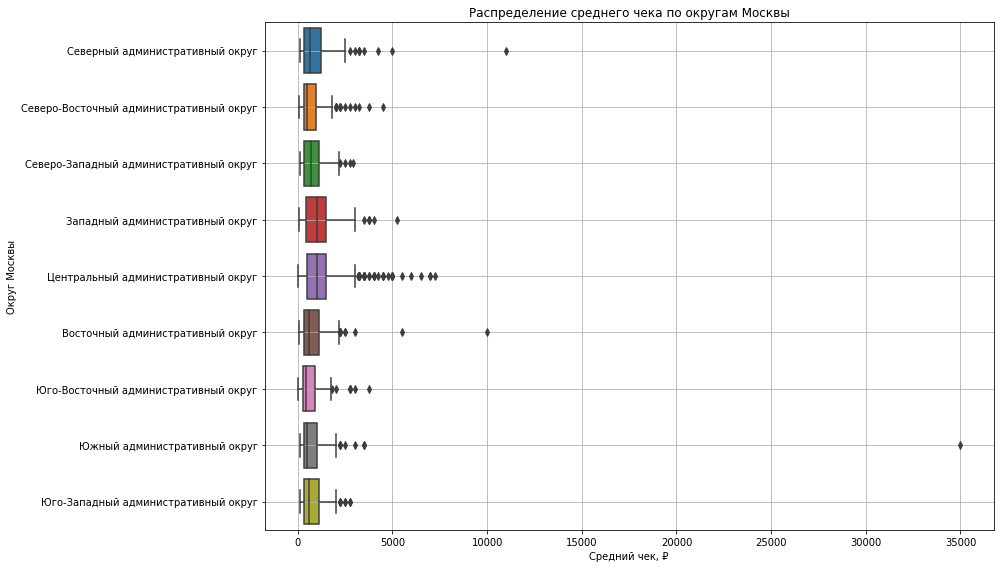

In [32]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_bill, x='middle_avg_bill', y='district', orient='h')
plt.title('Распределение среднего чека по округам Москвы')
plt.xlabel('Средний чек, ₽')
plt.ylabel('Округ Москвы')
plt.grid(True)
plt.tight_layout()
plt.show()

---


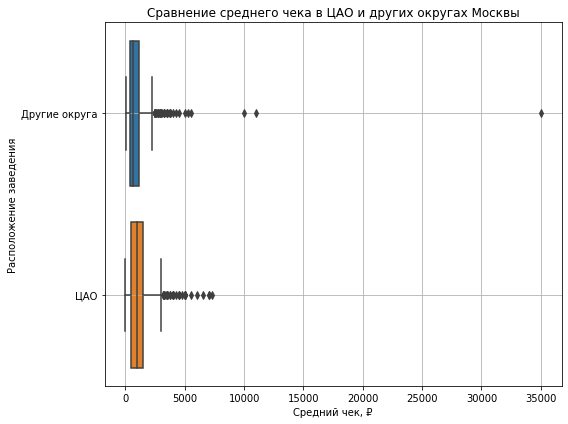

Средний чек в ЦАО: 1191 ₽
Средний чек в остальных округах: 840 ₽


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Создаем подтаблицу и копию
df_bill = merged_df[merged_df['middle_avg_bill'].notna() & merged_df['district'].notna()].copy()

# 2. Добавляем признак: заведение находится в ЦАО
df_bill['is_central'] = df_bill['district'] == 'Центральный административный округ'

# Приводим is_central к строке для безопасной визуализации
df_bill['is_central_str'] = df_bill['is_central'].map({True: 'ЦАО', False: 'Другие округа'})

# 3. Визуализация — boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_bill, x='middle_avg_bill', y='is_central_str')
plt.title('Сравнение среднего чека в ЦАО и других округах Москвы')
plt.xlabel('Средний чек, ₽')
plt.ylabel('Расположение заведения')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Подсчёт средних значений
central_avg = df_bill[df_bill['is_central']]['middle_avg_bill'].mean()
non_central_avg = df_bill[~df_bill['is_central']]['middle_avg_bill'].mean()

print(f"Средний чек в ЦАО: {central_avg:.0f} ₽")
print(f"Средний чек в остальных округах: {non_central_avg:.0f} ₽")

Центральный административный округ (ЦАО) уверенно выделяется самым высоким средним и медианным чеком среди всех округов Москвы. Это ожидаемо, учитывая высокую концентрацию туристических, деловых и премиальных заведений в центре города.
Разница в ценах между ЦАО и окраинными округами может достигать 20–40%, особенно в случае заведений среднего и высокого ценового сегмента.
В спальных районах и отдалённых округах преобладают заведения с доступным средним чеком — от 450 до 800 ₽. Это соответствует более низкой платежеспособности аудитории и ориентации на повседневное питание.
Удалённость от центра обратно коррелирует со средним чеком: чем дальше от центра находится округ, тем ниже стоимость среднего заказа. Это подтверждается снижением как среднего значения, так и медианы по мере удаления от ЦАО.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

 1. Категории заведений:
- Наиболее распространённые категории — кафе, рестораны и кофейни.
- Кафе — самая массовая категория, присутствующая во всех округах.
- Отдельные ниши, такие как пиццерии и бары, занимают меньшую долю.

2. География заведений:
- Больше всего заведений сосредоточено в Центральном административном округе (ЦАО).
- ЦАО — лидер по разнообразию форматов, высокому среднему чеку и плотности заведений.
- В спальных районах заведений меньше, и они чаще ориентированы на массовый спрос.

3. Сетевые и несетевые заведения:
- Преобладают несетевые заведения, но в таких категориях, как кофейни, пиццерии и булочные, сетевой формат доминирует.
- Сетевые заведения чаще представлены в формате кафе или быстрого питания.

4. Посадочные места:
- Большинство заведений рассчитаны на 40–75 мест.
- В кофейнях, в ресторанах, барах — больше мест.
- Встречаются выбросы: заведения с очень большим количеством мест, например, в торговых центрах.

5. Рейтинги:
- Распределение рейтингов скошено вверх: большинство заведений имеют оценку выше 4.0.
- Незначительная корреляция между рейтингом и другими параметрами: количество мест, ценовая категория, формат.
- В среднем, сетевые заведения имеют чуть более стабильные и высокие оценки, но различия не критичны.

6. Популярные сети:
- В топ-15 сетей входят такие бренды, как Шоколадница, доминос пицца, додо пицца и др.
- Эти сети в основном относятся к сегментам кофеен, кафе и фастфуда, с высоким уровнем узнаваемости и средней оценкой около 4.2–4.5.

7. Цены:
- Средний чек в ЦАО — самый высокий (около 1190 ₽).
- На окраинах чек может быть в 1.5–2 раза ниже (в ЮВАО — около 650 ₽).
- Чем дальше округ от центра — тем ниже средний чек, что подтверждает обратную корреляцию между удалённостью от центра и ценами.

Ключевые выводы:
Формат заведения, его сетевой статус и местоположение напрямую влияют на средний чек, количество мест и рейтинг.
ЦАО — привлекательная зона для премиальных или туристических заведений, с высоким средним чеком и большой конкуренцией.
Спальные районы лучше подойдут для демократичных форматов: кофеен, пиццерий и недорогих кафе.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

Итоговый вывод и рекомендации
1. Общий обзор проделанной работы:
- В рамках проекта был проведён исследовательский анализ рынка заведений общественного питания Москвы.
1.1. Анализ включал:
- изучение категорий заведений, их распределения по округам;
- оценку влияния сетевого формата, цен и количества посадочных мест;
- исследование зависимости рейтингов от различных факторов;
- анализ средней стоимости заказа (среднего чека) по локациям;
- визуализацию.

2. Основные выводы исследования:
2.1. География и формат:
- ЦАО — лидер по количеству заведений, их разнообразию и ценам.
- В удалённых и спальных районах меньше заведений, чаще встречаются форматы повседневного спроса: кофейни, недорогие кафе, пиццерии.
- Удалённость от центра обратно коррелирует с ценами: средний чек в ЦАО — около 1190 ₽, в окраинных округах — от 650 ₽.
2.2. Средний чек и ценовые сегменты:
- Средний чек зависит от округа, категории и формата заведения.
- Рестораны и премиальные кафе — дороже, кофейни и фастфуд — дешевле.
Самые дорогой округ: ЦАО, самый доступный: ЮВАО.
2.3. Сетевой формат:
- Примерно треть заведений — сетевые.
- Сетевые бренды чаще встречаются в кафе, кофейнях и фастфуде.
- Сетевые заведения в среднем получают немного более высокие рейтинги, но разница невелика.
2.4 Рейтинг:
- Большинство заведений имеют рейтинг выше 4.0.
- Самые высокие оценки чаще у кафе и кофеен.
- Связь между рейтингом и ценой или форматом заведения — слабая.

3. Рекомендации для инвестора:
3.1. Локация:
- Если ориентироваться на премиальный формат с высоким средним чеком — рассматривайте ЦАО.
Если цель — массовый спрос и быстрая окупаемость, подойдёт ЮВАО с более низкими арендными ставками и высоким трафиком местных жителей.
3.2. Формат заведения:
- Наиболее перспективны кафе и кофейни — они доминируют на рынке, гибкие в масштабировании и чаще входят в сетевые концепции.
- Если рассматривать нишевые форматы (бар, пиццерия, ресторвн), рекомендуется протестировать концепцию сначала в ЦАО.
3.3. Сетевой или индивидуальный формат:
- Открытие сетевого заведения (франшиза) может упростить маркетинг и операционные процессы.
- В случае авторского/уникального формата — важно правильно выбрать район и ценовую политику, особенно вне ЦАО.

4. Заключение:
Рынок общественного питания Москвы насыщен, но сегментирован. Успешное открытие нового заведения зависит от грамотного позиционирования по трем ключевым осям: локация — формат — ценовой уровень. Результаты анализа помогут инвестору выбрать оптимальную стратегию входа на рынок: от массового кафе в спальном районе до премиального ресторана в центре.